In [ ]:
%pylab inline
import torch
from torch.nn.parameter import Parameter

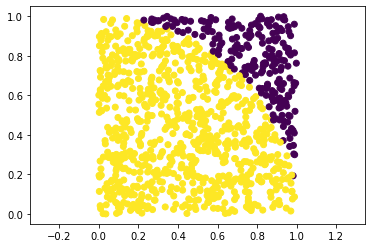

In [82]:
x = torch.rand([1000,2])
x_in_circle = ((x**2).sum(1) < 1)

def accuracy(pred_label):
    return (pred_label==x_in_circle).float().mean()

def show(pred_label):
    scatter(*x.numpy().T, c=pred_label.numpy())
    axis('equal')

def loss(prediction):
    return -(x_in_circle.float()     * (prediction+1e-10).log() +
             (1-x_in_circle.float()) * (1-prediction+1e-10).log() ).mean()

class Linear(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.w = Parameter(torch.zeros(input_dim))
        self.b = Parameter(-torch.zeros(1))
    
    def forward(self, x):
        return (x * self.w[None,:]).sum(dim=1) + self.b

class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = Linear(input_dim)
    
    def forward(self, x):
        logit = self.linear(x)
        return 1/(1+(-logit).exp())

show(x_in_circle)

Iteration: 0 Accuracy: 0.21
Iteration: 1000 Accuracy: 0.96
Iteration: 2000 Accuracy: 0.96
Iteration: 3000 Accuracy: 0.96
Iteration: 4000 Accuracy: 0.96
Iteration: 5000 Accuracy: 0.96
Iteration: 6000 Accuracy: 0.96
Iteration: 7000 Accuracy: 0.96
Iteration: 8000 Accuracy: 0.96
Iteration: 9000 Accuracy: 0.96


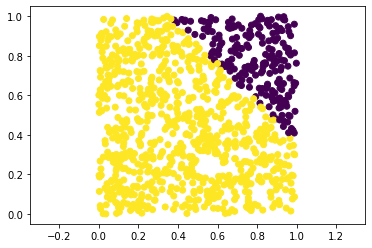

In [83]:

classifier = LinearClassifier(2)

for iteration in range(10000):
    p_y = classifier(x)
    pred_y = p_y > 0.5
    l = loss(p_y)    
    l.backward()
    for p in classifier.parameters():
        p.data[:] -= 0.5 * p.grad 
        p.grad.zero_()
    if iteration % 1000 == 0:
        print("Iteration: {} Accuracy: {:.2f}".format(iteration, accuracy(pred_y)))


show(pred_y)

In [84]:
class NonLinearClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_dim, 100)
        self.activation = torch.nn.ReLU()
        self.linear2 = Linear(100)
    
    def forward(self, x):
        logit = self.linear2( self.activation(self.linear1(x)) )
        return 1/(1+(-logit).exp())


classifier = NonLinearClassifier(2)
print(classifier)

NonLinearClassifier(
  (linear1): Linear(in_features=2, out_features=100, bias=True)
  (activation): ReLU()
  (linear2): Linear()
)


Iteration: 0 Accuracy: 0.21
Iteration: 1000 Accuracy: 0.98
Iteration: 2000 Accuracy: 0.99
Iteration: 3000 Accuracy: 0.99
Iteration: 4000 Accuracy: 0.99


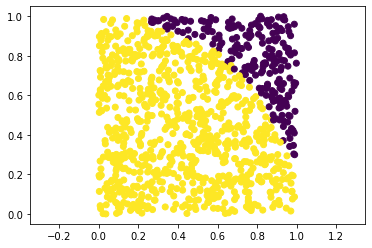

In [85]:

classifier = NonLinearClassifier(2)

for iteration in range(5000):
    p_y = classifier(x)
    pred_y = p_y > 0.5
    l = loss(p_y)
    l.backward()
    for p in classifier.parameters():
        p.data[:] -= 0.5 * p.grad
        p.grad.zero_()
        
    if iteration % 1000 == 0:
        print("Iteration: {} Accuracy: {:.2f}".format(iteration, accuracy(pred_y)))
    
show(pred_y)